In [110]:
import pandas as pd
import plotly.express as px

In [111]:
df_beetles = pd.read_csv('beetles.csv')
df_beetles

,ID,Group,Sex,date treated,date dead,OrNV detected,Notes
0,1,A,F,2023-03-06,2023-04-10,NaN,NaN
1,2,A,M,2023-03-06,2023-03-27,NaN,NaN
2,3,A,F,2023-03-06,2023-04-17,NaN,NaN
3,4,A,M,2023-03-06,2023-03-26,NaN,NaN
4,5,A,F,2023-03-06,NaN,NaN,alive at end of expt
...,...,...,...,...,...,...,...
103,110,D,M,2023-03-06,2023-03-01,NaN,NaN
104,112,D,M,2023-03-06,2023-03-27,NaN,NaN
105,113,D,F,2023-03-06,2023-03-26,NaN,NaN
106,114,D,M,2023-03-06,2023-04-12,NaN,NaN


In [112]:
df_observations = pd.read_csv('observations.csv')
df_observations

,ID,date,obs
0,1,2023-02-28,N
1,2,2023-02-28,N
2,3,2023-02-28,N
3,4,2023-02-28,N
4,5,2023-02-28,N
...,...,...,...
5630,111,2023-04-17,N
5631,112,2023-04-17,NaN
5632,113,2023-04-17,NaN
5633,114,2023-04-17,NaN


In [113]:
df_larvae = pd.read_csv('larvae.csv', parse_dates=['oviposition_starts','oviposition_ends','date checked'])
df_larvae

,group,oviposition_starts,oviposition_ends,date checked,larvae
0,A,2023-03-06,2023-03-13,2023-04-03,1
1,B,2023-03-06,2023-03-13,2023-04-03,12
2,C,2023-03-06,2023-03-13,2023-04-03,6
3,D,2023-03-06,2023-03-13,2023-04-03,1
4,A,2023-03-13,2023-03-20,2023-04-10,4
5,B,2023-03-13,2023-03-20,2023-04-10,5
6,C,2023-03-13,2023-03-20,2023-04-10,7
7,D,2023-03-13,2023-03-20,2023-04-10,1
8,A,2023-03-20,2023-03-27,2023-04-17,5
9,B,2023-03-20,2023-03-27,2023-04-17,7


In [114]:
def calc_female_days(row):
    df = df_beetles.merge(df_observations, on='ID')
    df = df.query('Sex == "F"')
    df = df.query(f'Group == "{row.group}"')
    df = df.query(f'date >= "{row.oviposition_starts}"')
    df = df.query(f'date <= "{row.oviposition_ends}"')
    df = df.query('obs == obs') # Exclude rows where obs is NaN
    return df.shape[0]

In [115]:
df_larvae['female_days'] = df_larvae.apply(calc_female_days, axis=1)
df_larvae['viable_eggs_per_day'] = df_larvae['larvae'] / df_larvae['female_days']
a = df_larvae['oviposition_starts']
b = df_larvae['oviposition_ends']
df_larvae['midpoint'] = a + (b - a)/2
df_larvae

,group,oviposition_starts,oviposition_ends,date checked,larvae,female_days,viable_eggs_per_day,midpoint
0,A,2023-03-06,2023-03-13,2023-04-03,1,128,0.007812,2023-03-09 12:00:00
1,B,2023-03-06,2023-03-13,2023-04-03,12,123,0.097561,2023-03-09 12:00:00
2,C,2023-03-06,2023-03-13,2023-04-03,6,54,0.111111,2023-03-09 12:00:00
3,D,2023-03-06,2023-03-13,2023-04-03,1,109,0.009174,2023-03-09 12:00:00
4,A,2023-03-13,2023-03-20,2023-04-10,4,111,0.036036,2023-03-16 12:00:00
5,B,2023-03-13,2023-03-20,2023-04-10,5,122,0.040984,2023-03-16 12:00:00
6,C,2023-03-13,2023-03-20,2023-04-10,7,54,0.129630,2023-03-16 12:00:00
7,D,2023-03-13,2023-03-20,2023-04-10,1,109,0.009174,2023-03-16 12:00:00
8,A,2023-03-20,2023-03-27,2023-04-17,5,114,0.043860,2023-03-23 12:00:00
9,B,2023-03-20,2023-03-27,2023-04-17,7,126,0.055556,2023-03-23 12:00:00


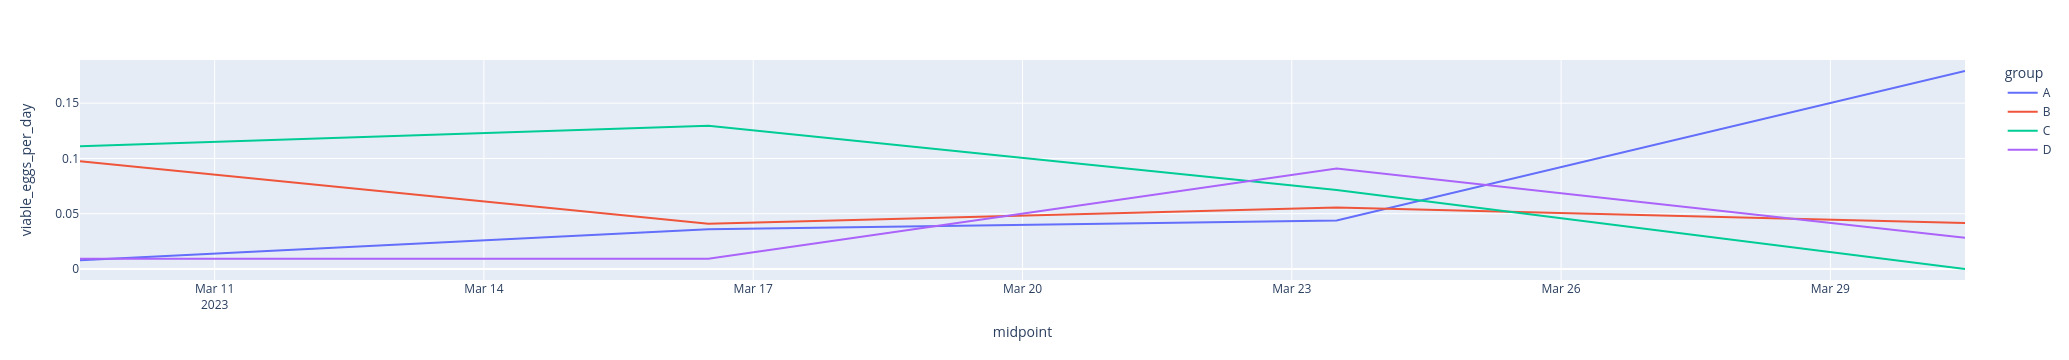

In [119]:
fig = px.line(df_larvae, x="midpoint", y="viable_eggs_per_day", color='group')
fig.show()

In [118]:
print('Mean number of viable eggs per female per day')
df_larvae.groupby('group')['viable_eggs_per_day'].mean()

Mean number of viable eggs per female per day


group
A    0.066703
B    0.058942
C    0.078042
D    0.034357
Name: viable_eggs_per_day, dtype: float64